In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.width', 5000)
pd.set_option('max_rows', 20)

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [6]:
fec = pd.read_csv('P00000001-ALL.txt')

/home/seth/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
fec.head()

,Unnamed: 0,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [8]:
fec['party'] = fec.cand_nm.map(parties) #dict or function
# equivalent
# fec['parties'] = [parties[candidate] for candidate in fec.camd_nm]


In [15]:
fec.party.value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [17]:
fec.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [19]:
fec.groupby(['party','contb_receipt_dt'])['contb_receipt_amt'].sum()

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
                                   ...    
Republican  30-OCT-11             43913.16
            30-SEP-11           4886331.76
            31-AUG-11           1017735.02
            31-DEC-11           1094376.72
            31-JAN-11              6000.00
            31-JAN-12            869890.41
            31-JUL-11             12781.02
            31-MAR-11             62475.00
            31-MAY-11            301339.80
            31-OCT-11            734601.83
Name: contb_receipt_amt, dtype: float64

In [20]:
import datetime
def convert_date(date_str):
    d, m, y =date_str.split('-')
    m= months[m]
    return datetime.datetime(int('20' + y), m, int(d))

In [21]:
convert_date('20-JAN-11')

datetime.datetime(2011, 1, 20, 0, 0)

In [25]:
fec['date']=fec.contb_receipt_dt.map(convert_date)
fec.date

0        2011-06-20
1        2011-06-23
2        2011-07-05
3        2011-08-01
4        2011-06-20
5        2011-06-23
6        2011-06-21
7        2011-07-05
8        2011-06-21
9        2011-06-20
            ...    
536031   2011-09-30
536032   2011-08-26
536033   2011-10-01
536034   2011-09-30
536035   2011-09-30
536036   2011-08-31
536037   2011-09-30
536038   2011-09-29
536039   2011-09-30
536040   2011-09-29
Name: date, dtype: datetime64[ns]

In [28]:
by_date = fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()

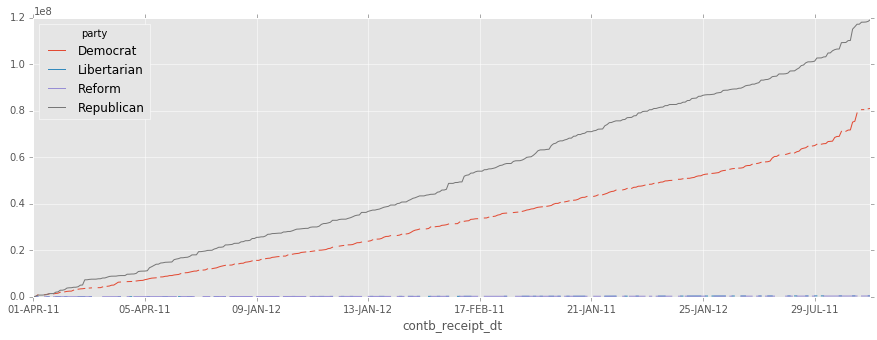

In [29]:
by_date.unstack('party') .cumsum().plot()

In [31]:
s = by_date.unstack('party')[-5:].stack()

In [32]:
s

contb_receipt_dt  party      
31-JAN-12         Democrat       1418410.31
                  Reform             150.00
                  Republican      869890.41
31-JUL-11         Democrat         20305.00
                  Reform             966.00
                  Republican       12781.02
31-MAR-11         Reform             200.00
                  Republican       62475.00
31-MAY-11         Democrat        351705.66
                  Libertarian        250.00
                  Reform             100.00
                  Republican      301339.80
31-OCT-11         Democrat        204996.87
                  Libertarian       4250.00
                  Reform            3105.00
                  Republican      734601.83
dtype: float64

In [33]:
df = s.unstack('party')

In [36]:
pd.concat([df, df], keys=['A', 'B'])

party                 Democrat  Libertarian  Reform  Republican
  contb_receipt_dt                                             
A 31-JAN-12         1418410.31          NaN   150.0   869890.41
  31-JUL-11           20305.00          NaN   966.0    12781.02
  31-MAR-11                NaN          NaN   200.0    62475.00
  31-MAY-11          351705.66        250.0   100.0   301339.80
  31-OCT-11          204996.87       4250.0  3105.0   734601.83
B 31-JAN-12         1418410.31          NaN   150.0   869890.41
  31-JUL-11           20305.00          NaN   966.0    12781.02
  31-MAR-11                NaN          NaN   200.0    62475.00
  31-MAY-11          351705.66        250.0   100.0   301339.80
  31-OCT-11          204996.87       4250.0  3105.0   734601.83

In [41]:
result = fec.groupby(['cand_nm', 'contbr_occupation']).sum()

In [42]:
result = result.reset_index()
result

,cand_nm,contbr_occupation,contb_receipt_amt,file_num
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50,6807894
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25,2260398
2,"Bachmann, Michelle",A/C AND HEAT,250.00,749016
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00,762366
4,"Bachmann, Michelle",ACCOUNT,50.00,762366
5,"Bachmann, Michelle",ACCOUNT ANALYST,200.00,749016
6,"Bachmann, Michelle",ACCOUNT EXECUTIVE,100.00,762366
7,"Bachmann, Michelle",ACCOUNT MANAGER,230.00,1524732
8,"Bachmann, Michelle",ACCOUNTANT,12979.00,49048913
9,"Bachmann, Michelle",ACCOUNTANT TRAINER,250.00,736307


In [46]:
def top5_donors(group):
    return group.sort_values(by='contb_receipt_amt')[-5:]
result.groupby('cand_nm').apply(top5_donors)

cand_nm                       contbr_occupation  contb_receipt_amt    file_num
cand_nm                                                                                                            
Bachmann, Michelle 920    Bachmann, Michelle                               PRESIDENT           68781.00    95289630
                   892    Bachmann, Michelle                               PHYSICIAN           76134.00   198136204
                   555    Bachmann, Michelle                               HOMEMAKER          102540.00   237509004
                   594    Bachmann, Michelle                   INFORMATION REQUESTED          147638.89   835457555
                   1058   Bachmann, Michelle                                 RETIRED          824618.05  3260564234
Cain, Herman       1536         Cain, Herman                                     CEO          125097.00   107909571
                   2225         Cain, Herman                               PHYSICIAN          125790.96   284576449
                   1897         Cain, Herman                               HOMEMAKER          153964.07   238089492
                   2389         Cain, Herman                                 RETIRED          779635.51  2085568644
                   1928         Cain, Herman                   INFORMATION REQUESTED         3838719.32  6878659745
...                                      ...                                     ...                ...         ...
Romney, Mitt       37406        Romney, Mitt                               PRESIDENT         1522751.99   837485967
                   34625        Romney, Mitt                                ATTORNEY         3662610.21  2701032161
                   36317        Romney, Mitt                               HOMEMAKER         5442013.48  3071313520
                   36411        Romney, Mitt  INFORMATION REQUESTED PER BEST EFFORTS         6394753.06  5099292740
                   37910        Romney, Mitt                                 RETIRED         6483596.24  9766405414
Santorum, Rick     38856      Santorum, Rick                                ATTORNEY          107130.00   189114568
                   39180      Santorum, Rick                               EXECUTIVE          131456.55   106279150
                   39341      Santorum, Rick    INFORMATION REQUESTED (BEST EFFORTS)          284718.10   502656827
                   39305      Santorum, Rick                               HOMEMAKER          350597.75   502312893
                   39812      Santorum, Rick                                 RETIRED          421952.98  1341605527

[65 rows x 4 columns]

In [49]:
result.groupby('cand_nm').apply(top5_donors).contbr_occupation

cand_nm                  
Bachmann, Michelle  920                                   PRESIDENT
                    892                                   PHYSICIAN
                    555                                   HOMEMAKER
                    594                       INFORMATION REQUESTED
                    1058                                    RETIRED
Cain, Herman        1536                                        CEO
                    2225                                  PHYSICIAN
                    1897                                  HOMEMAKER
                    2389                                    RETIRED
                    1928                      INFORMATION REQUESTED
                                              ...                  
Romney, Mitt        37406                                 PRESIDENT
                    34625                                  ATTORNEY
                    36317                                 HOMEMAKER
                    36